In [3]:

import numpy as np
from utils_predictions_manipulation import*
from utils_nans_manipulation import*
from cross_validation import*
from utils_data_loading import*
from utils_features_manipulation import*
import random


from least_squares import *

In [4]:
traindata,_ = load_data('Data/train.csv')
X_total, Y_total = structure_data(traindata)

# Replacing undefined data with NaNs
X_nans = replace_bad_data_with_nans(X_total, -999)

X_nans, col = replace_nans_with_median(X_nans, threshold=0.5)

In [5]:
ind_v = (1, 3, 5, 7, 13, 16, 18, 20, 23) 
deg_v = [(0.25, 0.3333333333333333, 2), (0.03333333333333333, 0.1, 0.2, 0.3333333333333333, 0.5, 2), (0.1, 0.3333333333333333, 20), (0.03333333333333333, 0.05, 0.2, 0.3333333333333333, 30), (0.05, 10), [0.25, 3, 4, 0.3333333333333333], (3, 10, 20), (0.1, 0.3333333333333333, 4), (0.03333333333333333, 0.2, 1), (0.1, 2, 5), (0.05, 0.1, 1), (0.2, 0.3333333333333333, 0.5, 2, 4, 10), (0.1, 0.25, 0.3333333333333333, 1, 5, 30), (1, 3, 30), (0.1, 5, 10), (0.25, 3, 30), (0.1, 10, 30), (0.2, 1, 3), (0.05, 0.5, 30), (1, 3, 4), (0.3333333333333333, 3, 5), (2, 10), (0.25, 0.3333333333333333, 1), (0.05, 0.2, 30)]

In [6]:
X_poly = build_poly_index(X_nans, ind_v, deg_v)

In [147]:

pr1_s = []
pr2_s = []
pr1f_s = []
pr2f_s = []

tr_s = []
for split_size in range(4,30):
    pr1 = []
    pr2 = []
    pr1f = []
    pr2f = []
    for seed in range(10):

        split = build_k_indices(Y_total,split_size,seed)
        tr = split[0]
        ts1 = split[1]
        ts2 = np.ndarray.flatten(split[2:])

        w, l = least_squares(Y_total[tr], X_poly[tr])

        pred_y1 = probability_to_prediction(X_poly[ts1].dot(w))
        pred_y1[pred_y1 == -1]=0

        pred_y2 = probability_to_prediction(X_poly[ts2].dot(w))
        pred_y2[pred_y2 == -1]=0

        pr1.append(get_prediction_accuracy(Y_total[ts1], pred_y1))
        pr2.append(get_prediction_accuracy(Y_total[ts2], pred_y2))

        Y_fix1 = np.logical_xor(Y_total[ts1], pred_y1)
        Y_fix2 = np.logical_xor(Y_total[ts2], pred_y2)

        wf1, lf = least_squares(Y_fix1, X_poly[ts1])
        wf2, lf = least_squares(Y_fix2, X_poly[ts2])

        fix_y1 = probability_to_prediction(X_poly[ts1].dot(wf2))
        fix_y1[fix_y1 == -1]=0
        fix_y2 = probability_to_prediction(X_poly[ts2].dot(wf1))
        fix_y2[fix_y2 == -1]=0

        pred_y1_fixed = pred_y1.copy()
        for i,s in enumerate(fix_y1):
            if s == 1:
                if pred_y1_fixed[i] == 1:
                    pred_y1_fixed[i] = 0
                else:
                    pred_y1_fixed[i] = 1

        pred_y2_fixed = pred_y2.copy()
        for i,s in enumerate(fix_y2):
            if s == 1:
                if pred_y2_fixed[i] == 1:
                    pred_y2_fixed[i] = 0
                else:
                    pred_y2_fixed[i] = 1

        pr1f.append(get_prediction_accuracy(Y_total[ts1], pred_y1_fixed))
        pr2f.append(get_prediction_accuracy(Y_total[ts2], pred_y2_fixed))

    print("\n", split_size, len(tr))
    print(np.mean(pr1), np.mean(pr2))
    print(np.mean(pr1f), np.mean(pr2f))
    print(np.mean(pr1)<np.mean(pr1f), np.mean(pr2)<np.mean(pr2f))
    pr1_s.append(np.mean(pr1))
    pr2_s.append(np.mean(pr2))
    pr1f_s.append(np.mean(pr1f))
    pr2f_s.append(np.mean(pr2f))
    tr_s.append(len(tr))


 4 62500
0.7655024 0.7666192
0.7843823999999999 0.7532808
True False

 5 50000
0.7964180000000001 0.7960860000000001
0.795816 0.7961579999999999
False True

 6 41666
0.7959871357941728 0.795808332933327
0.7829501272020352 0.7925832813325013
False False

 7 35714
0.7958447667581341 0.7957887663101305
0.7623984991879935 0.7887203897631181
False False

 8 31250
0.7954432 0.7960906666666666
0.7948416 0.7952469333333333
False False

 9 27777
0.7954386722828238 0.7959385719943016
0.7949742592792597 0.7955579899094317
False False

 10 25000
0.7954959999999999 0.7957925
0.7956240000000001 0.7956835000000001
True False

 11 22727
0.7964007568090816 0.7959040397373658
0.7948959387512651 0.7958952396317645
False False

 12 20833
0.7961263380214083 0.7948019968319493
0.7961263380214083 0.7948576777228435
False True

 13 19230
0.797223088923557 0.7961239540490711
0.7971294851794071 0.7961490095967475
False True

 14 17857
0.7968751750013999 0.7956258983405201
0.7967463739709918 0.7956436318157212


In [148]:
import matplotlib.pyplot as plt

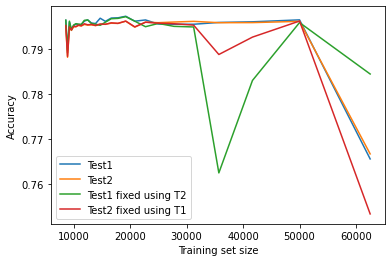

In [155]:
plt.figure()
plt.plot(tr_s, pr1_s)
plt.plot(tr_s, pr2_s)
plt.plot(tr_s, pr1f_s)
plt.plot(tr_s, pr2f_s)
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend(["Test1", "Test2", "Test1 fixed using T2", "Test2 fixed using T1"])
plt.show()

0.7937431749726999
0.7937311749246997
